## ***Data Processing***

In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [557]:
# anomalous sample to analyse the clustering models
anomalous_sample = {
    "Form": "Decoction",
    "Ashwagandha": 0.70,
    "Triphala": 0.00,
    "Amalaki": 0.00,
    "Haritaki": 0.00,
    "Bibhitaki": 0.00,
    "Neem": 0.00,
    "Tulsi": 0.00,
    "Brahmi": 0.00,
    "Shankhpushpi": 0.00,
    "Turmeric": 0.00,
    "Ginger": 0.00,
    "Garlic": 0.00,
    "Clove": 0.00,
    "Cardamom": 0.00,
    "Cinnamon": 0.00,
    "Pepper": 0.00,
    "Licorice": 0.00,
    "Guduchi": 0.00,
    "Shatavari": 0.00,
    "AloeVera": 0.00,
    "Moringa": 0.00,
    "Fenugreek": 0.00,
    "Cumin": 0.00,
    "Coriander": 0.00,
    "Mustard": 0.00,
    "Saffron": 0.00,
    "Nutmeg": 0.00,
    "Fennel": 0.00,
    "Camphor": 0.00,
    "Jatamansi": 0.00,
    "Kesar": 0.00,
    "Pippali": 0.00,
    "Punarnava": 0.00,
    "Arjuna": 0.00,
    "Guggulu": 0.00,
    "Manjistha": 0.00,
    "Kalonji": 0.00,
    "Baheda": 0.00,
    "Giloy": 0.00,
    "Daruharidra": 0.00,
    "Vidanga": 0.00,
    "Hibiscus": 0.00,
    "AmlaOil": 0.00,
    "Ashoka": 0.00,
    "Bhringraj": 0.00,
    "SafedMusli": 0.00,
    "KaunchBeej": 0.00,
    "Palash": 0.00,
    "Agarwood": 0.00,
    "Chitrak": 0.00,
    "Proportion_Others": 0.30,
    "Price": 9999,
    "Dosage(g)": 15.0,
    "Shelf_Life(months)": 120,
    "Preparation_Method": "Unknown",
    "Speciality": "Weight Loss"
}

In [558]:
# data pipeline building
preprocess_pipeline = Pipeline([
    ('scaler', StandardScaler()),      # standardize features
    ('normalizer', Normalizer())       # normalize each sample to unit norm
])

In [559]:
# frequently used functions

# test train data splitting
def split_dataset(data):
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
    return train_data, test_data

# Accessing the ingredients cols
def ex_ingred_df (data):
    return data.loc[:, 'Ashwagandha': 'Proportion_Others']

# Visualise the scatter
def visualise_scatter(data, labels=np.zeros(shape=(800))): 
    all_ingreds = list(data)
    left, right = all_ingreds[:24], all_ingreds[25:]
    x, y = data[left].sum(axis= 1), data[right].sum(axis= 1)
    plt.scatter(x, y, c=labels, cmap='plasma', marker= 'o', s=50)
    plt.xlabel("Left 25 Ingrediants")
    plt.ylabel("Right 25 Ingrediants")
    plt.title("Scatter Plot")
    plt.show()


# scalify and normalise datapoints
def modify_data(data): 
    return preprocess_pipeline.fit_transform(data)




In [560]:
data = pd.read_csv('../data/ayurvedic_products_1.csv', index_col='Speciality')
data

,Product_ID,Product_Name,Form,Ashwagandha,Triphala,Amalaki,Haritaki,Bibhitaki,Neem,Tulsi,...,SafedMusli,KaunchBeej,Palash,Agarwood,Chitrak,Proportion_Others,Price,Dosage(g),Shelf_Life(months),Preparation_Method
Speciality,,,,,,,,,,,,,,,,,,,,,
Weight Loss,P0001,Product_1,Decoction,0.02,0.01,0.04,0.00,0.00,0.01,0.01,...,0.00,0.00,0.00,0.02,0.00,0.13,679,0.44,12,Fermentation
Weight Loss,P0002,Product_2,Tablet,0.02,0.02,0.02,0.02,0.01,0.01,0.03,...,0.01,0.03,0.01,0.01,0.01,0.12,679,0.27,36,Extract
Diabetes Management,P0003,Product_3,Decoction,0.00,0.04,0.02,0.02,0.01,0.02,0.02,...,0.03,0.01,0.00,0.00,0.04,0.10,958,0.40,36,TabletCompression
Joint Pain Relief,P0004,Product_4,Powder,0.01,0.00,0.01,0.02,0.01,0.03,0.01,...,0.02,0.03,0.02,0.00,0.02,0.09,963,0.29,36,PowderBlend
Cardiac Health,P0005,Product_5,Powder,0.03,0.00,0.03,0.03,0.00,0.01,0.02,...,0.03,0.04,0.00,0.00,0.02,0.08,551,0.51,24,Decoction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Joint Pain Relief,P0996,Product_996,Powder,0.03,0.03,0.02,0.03,0.03,0.01,0.02,...,0.02,0.01,0.03,0.01,0.01,0.10,524,0.27,36,Extract
Kidney Care,P0997,Product_997,Capsule,0.02,0.01,0.01,0.03,0.04,0.03,0.03,...,0.04,0.01,0.02,0.03,0.00,0.06,107,0.51,36,Fermentation
Respiratory Health,P0998,Product_998,Paste,0.02,0.02,0.03,0.02,0.00,0.00,0.03,...,0.03,0.02,0.02,0.02,0.00,0.12,775,0.54,18,Extract


In [561]:
# Removing unimportant feilds
data.drop(columns=['Product_ID', 'Product_Name'], axis=1, inplace=True)
data

,Form,Ashwagandha,Triphala,Amalaki,Haritaki,Bibhitaki,Neem,Tulsi,Brahmi,Shankhpushpi,...,SafedMusli,KaunchBeej,Palash,Agarwood,Chitrak,Proportion_Others,Price,Dosage(g),Shelf_Life(months),Preparation_Method
Speciality,,,,,,,,,,,,,,,,,,,,,
Weight Loss,Decoction,0.02,0.01,0.04,0.00,0.00,0.01,0.01,0.03,0.02,...,0.00,0.00,0.00,0.02,0.00,0.13,679,0.44,12,Fermentation
Weight Loss,Tablet,0.02,0.02,0.02,0.02,0.01,0.01,0.03,0.03,0.02,...,0.01,0.03,0.01,0.01,0.01,0.12,679,0.27,36,Extract
Diabetes Management,Decoction,0.00,0.04,0.02,0.02,0.01,0.02,0.02,0.02,0.03,...,0.03,0.01,0.00,0.00,0.04,0.10,958,0.40,36,TabletCompression
Joint Pain Relief,Powder,0.01,0.00,0.01,0.02,0.01,0.03,0.01,0.02,0.01,...,0.02,0.03,0.02,0.00,0.02,0.09,963,0.29,36,PowderBlend
Cardiac Health,Powder,0.03,0.00,0.03,0.03,0.00,0.01,0.02,0.02,0.02,...,0.03,0.04,0.00,0.00,0.02,0.08,551,0.51,24,Decoction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Joint Pain Relief,Powder,0.03,0.03,0.02,0.03,0.03,0.01,0.02,0.01,0.00,...,0.02,0.01,0.03,0.01,0.01,0.10,524,0.27,36,Extract
Kidney Care,Capsule,0.02,0.01,0.01,0.03,0.04,0.03,0.03,0.03,0.01,...,0.04,0.01,0.02,0.03,0.00,0.06,107,0.51,36,Fermentation
Respiratory Health,Paste,0.02,0.02,0.03,0.02,0.00,0.00,0.03,0.03,0.03,...,0.03,0.02,0.02,0.02,0.00,0.12,775,0.54,18,Extract


In [562]:
# split the dataset into train and test
train_data, test_data = split_dataset(data)[0], split_dataset(data)[1]
data = train_data
train_data.shape, test_data.shape

((800, 56), (200, 56))

In [563]:
ingred_df = ex_ingred_df(data)
ingred_df

,Ashwagandha,Triphala,Amalaki,Haritaki,Bibhitaki,Neem,Tulsi,Brahmi,Shankhpushpi,Turmeric,...,Hibiscus,AmlaOil,Ashoka,Bhringraj,SafedMusli,KaunchBeej,Palash,Agarwood,Chitrak,Proportion_Others
Speciality,,,,,,,,,,,,,,,,,,,,,
Memory & Cognition,0.00,0.01,0.01,0.02,0.02,0.01,0.00,0.03,0.03,0.03,...,0.03,0.01,0.01,0.01,0.03,0.01,0.03,0.02,0.01,0.11
Hair & Scalp Care,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.00,0.03,...,0.00,0.02,0.02,0.01,0.03,0.00,0.03,0.03,0.00,0.15
Immunity Booster,0.02,0.01,0.02,0.01,0.00,0.00,0.02,0.03,0.03,0.03,...,0.01,0.01,0.01,0.00,0.01,0.03,0.01,0.03,0.00,0.13
Memory & Cognition,0.02,0.01,0.02,0.03,0.00,0.03,0.02,0.01,0.00,0.03,...,0.01,0.03,0.02,0.01,0.03,0.01,0.01,0.03,0.03,0.10
Digestive Cleanser,0.00,0.02,0.00,0.00,0.01,0.03,0.02,0.04,0.01,0.03,...,0.00,0.03,0.01,0.01,0.02,0.02,0.00,0.02,0.03,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Women's Health,0.02,0.03,0.02,0.02,0.02,0.02,0.03,0.03,0.01,0.02,...,0.02,0.03,0.00,0.02,0.03,0.02,0.00,0.03,0.01,0.12
Respiratory Health,0.03,0.01,0.02,0.03,0.01,0.03,0.02,0.02,0.00,0.02,...,0.01,0.03,0.00,0.00,0.02,0.03,0.01,0.01,0.02,0.11
Skin Disorders,0.01,0.00,0.02,0.02,0.02,0.03,0.00,0.03,0.01,0.03,...,0.01,0.02,0.01,0.02,0.02,0.03,0.01,0.01,0.03,0.13


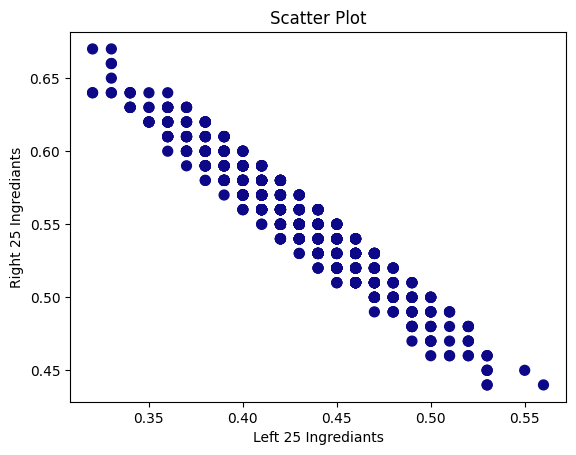

In [564]:
visualise_scatter(ingred_df)

In [565]:
dbscan_data = modify_data(ingred_df)
dbscan_data_df = pd.DataFrame(dbscan_data)
dbscan_data

array([[-0.24862376, -0.11310914, -0.12188857, ...,  0.02714384,
        -0.10797026,  0.01352834],
       [ 0.03426541, -0.10042049,  0.02315375, ...,  0.15177477,
        -0.22095837,  0.28851656],
       [ 0.03017449, -0.08843136,  0.02038944, ...,  0.13365448,
        -0.1945783 ,  0.13232377],
       ...,
       [-0.09370193, -0.22969628,  0.02327001, ..., -0.10409717,
         0.15511744,  0.15101813],
       [-0.30743457,  0.03859103,  0.03224829, ...,  0.21139027,
        -0.13351012, -0.07955019],
       [-0.19011696, -0.086492  ,  0.13309   , ...,  0.02075628,
         0.24068357, -0.16827069]], shape=(800, 51))

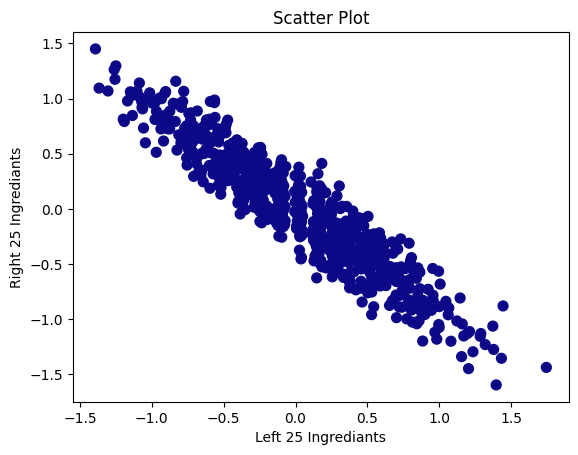

In [566]:
visualise_scatter(dbscan_data_df)

## ***Anomaly Product Detection (DBSCAN)***

In [567]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [568]:
# frequently used functions

# appropriate eps finding for dbscan
def find_perfect_eps (data):
    knn = NearestNeighbors(n_neighbors=5).fit(data)
    neighbors = knn.kneighbors(data)
    dist, _ = neighbors
    distances = np.sort(dist[:, -1])
    plt.plot(distances, marker="o")
    plt.ylabel(f"{5}-NN distance")
    plt.xlabel("Points sorted by distance")
    plt.title("k-distance graph (choose eps at elbow)")
    plt.show()

def analyse_score(data, res):
    return silhouette_score(data, res)

# predict sample
def predict_sample(dbscan_model, sample) :
    sample_ingred_df = ex_ingred_df(sample)
    modified_sample = preprocess_pipeline.transform(sample_ingred_df)

    core_points = dbscan_model.components_
    labels = dbscan_model.labels_
    eps = 1.14


    # knn model fitted with core points to find 1 nearest core point of the given sample
    knn = NearestNeighbors(n_neighbors=1).fit(core_points)
    dist, _ = knn.kneighbors(modified_sample)

    if dist[0][0] <= eps:
        return labels[_[0][0]]
    return -1


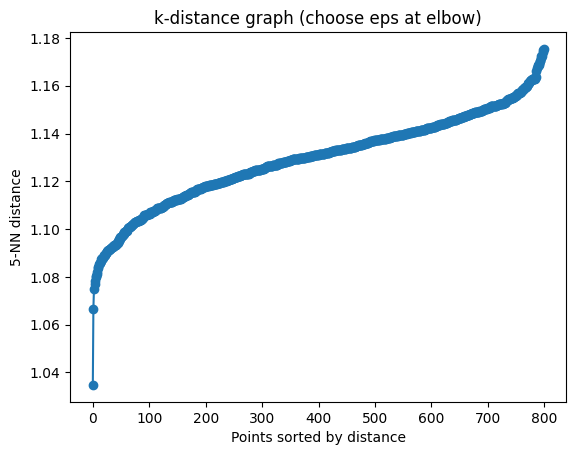

In [569]:
find_perfect_eps(dbscan_data)

In [570]:
dbscan = DBSCAN(eps=1.14,min_samples=5)
dbscan_model = dbscan.fit(dbscan_data)

In [571]:
labels = dbscan_model.labels_
labels

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

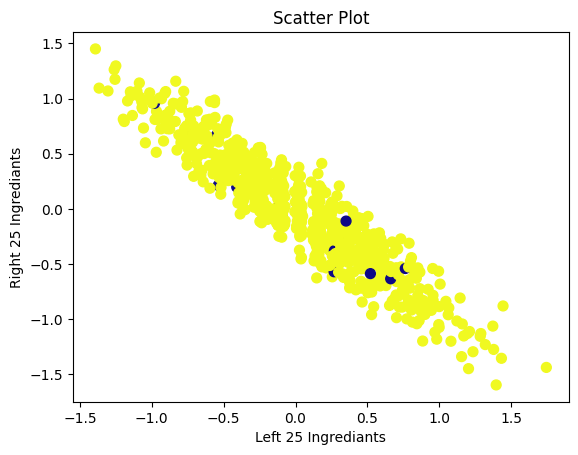

In [572]:
visualise_scatter(dbscan_data_df, labels)

In [573]:
analyse_score(dbscan_data, labels)

0.00047705633605072144

In [574]:
core_points = dbscan_model.components_
core_points

array([[ 0.03017449, -0.08843136,  0.02038944, ...,  0.13365448,
        -0.1945783 ,  0.13232377],
       [ 0.03324742, -0.0974371 ,  0.02246587, ...,  0.14726569,
         0.14975712, -0.05541889],
       [-0.17646715,  0.02215121, -0.19153762, ...,  0.01926605,
         0.12339059, -0.04566173],
       ...,
       [ 0.180208  , -0.1118698 ,  0.02579359, ..., -0.11538631,
         0.0325762 ,  0.01338011],
       [-0.09370193, -0.22969628,  0.02327001, ..., -0.10409717,
         0.15511744,  0.15101813],
       [-0.19011696, -0.086492  ,  0.13309   , ...,  0.02075628,
         0.24068357, -0.16827069]], shape=(556, 51))

In [575]:
sample = test_data[4:6]
predict_sample(dbscan_model, sample)

np.int64(0)

In [576]:
sample = pd.DataFrame([anomalous_sample])
predict_sample(dbscan_model, sample)

-1